In [ ]:
from matplotlib import pyplot as plt
import os
import numpy as np
import cv2

In [2]:
filter1=[[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]]

In [3]:
row=5
col=5

In [4]:
count1=0
for i in filter1:
    for j in i:
        count1=count1+j

In [5]:
count1

256

In [6]:
filter1=np.array(filter1)
filter1

array([[ 1,  4,  6,  4,  1],
       [ 4, 16, 24, 16,  4],
       [ 6, 24, 36, 24,  6],
       [ 4, 16, 24, 16,  4],
       [ 1,  4,  6,  4,  1]])

In [7]:
filter1=filter1/256

In [8]:
filter1

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.0234375 ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]])

In [9]:
path="/Users/shobhitsharma/Downloads/Adaptive Threshold/"

In [10]:
img_names=os.listdir(path)

In [12]:
img_names

['7221.8_411.png',
 '6960.43_706.png',
 'soya.png',
 '7209.114_215.png',
 '7200.42_778.png']

In [13]:
im=cv2.cvtColor(cv2.imread(path+img_names[1]),cv2.COLOR_BGR2RGB)

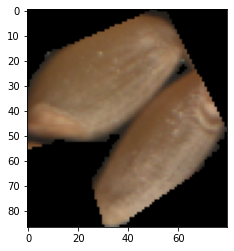

In [14]:
plt.imshow(im)

np.unique(im,return_counts=True)

In [15]:
def padding(im,row=5,col=5):
    pad=np.zeros((im.shape[0]+2*(row//2),im.shape[1]+2*(col//2),3),"uint8")
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            pad[i+row//2,j+col//2]=im[i,j,:]
    return pad

In [16]:
def threshold_g(pad,row=5,col=5,T=80,C=20):
    for i in range(row//2,pad.shape[0]-row//2):
        for j in range(col//2,pad.shape[1]-col//2):
            if(pad[i,j,0]<T and pad[i,j,0]!=0):
                #print("i,j : "+str(i)+" "+str(j)+" Red: "+str(pad[i,j]))
                th=0
                for x in range(-row//2,(row//2)+1):
                    for y in range(-col//2,(col//2)+1):
                        th+=filter1[(row//2)+x,(col//2)+y]*pad[i+x,j+y,0]
                th=np.uint8(np.round(th))
                #print("threshold for (i,j): "+str(th)+" ("+str(i)+","+str(j)+") I= "+str(pad[i,j]))
                th=max(0,th-C)
                if(th<pad[i,j,0]):
                    pad[i,j]=[0,0,0]
    return pad

In [17]:
def plot_f(pad,im,size=(17,10)):
    fig=plt.figure(figsize=size)
    fig.add_subplot(1,2,1)
    plt.title("Threshold output")
    plt.imshow(pad)
    fig.add_subplot(1,2,2)
    plt.title("Original Image")
    plt.imshow(im)
    plt.show()

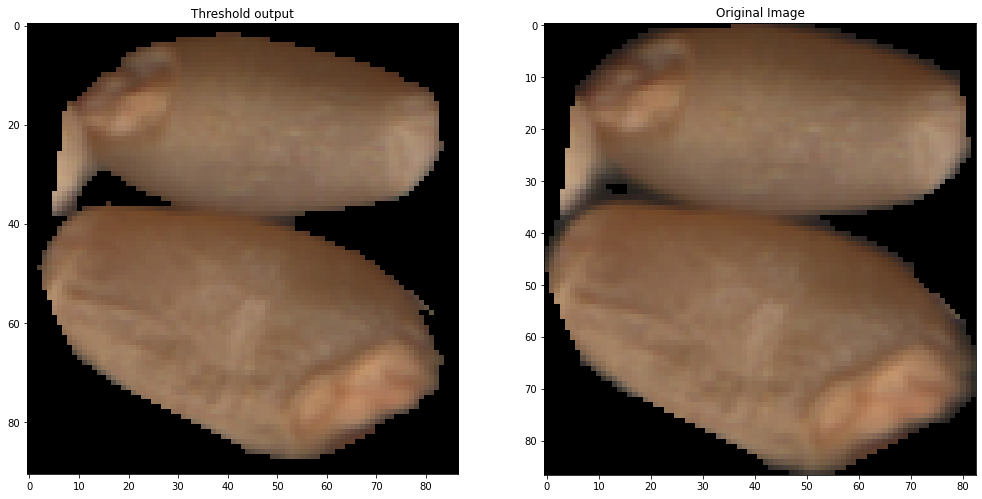

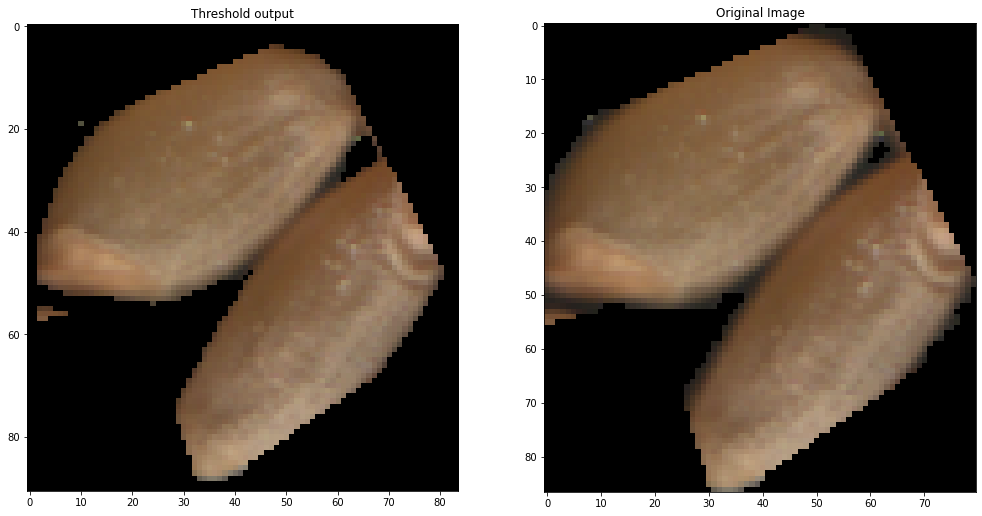

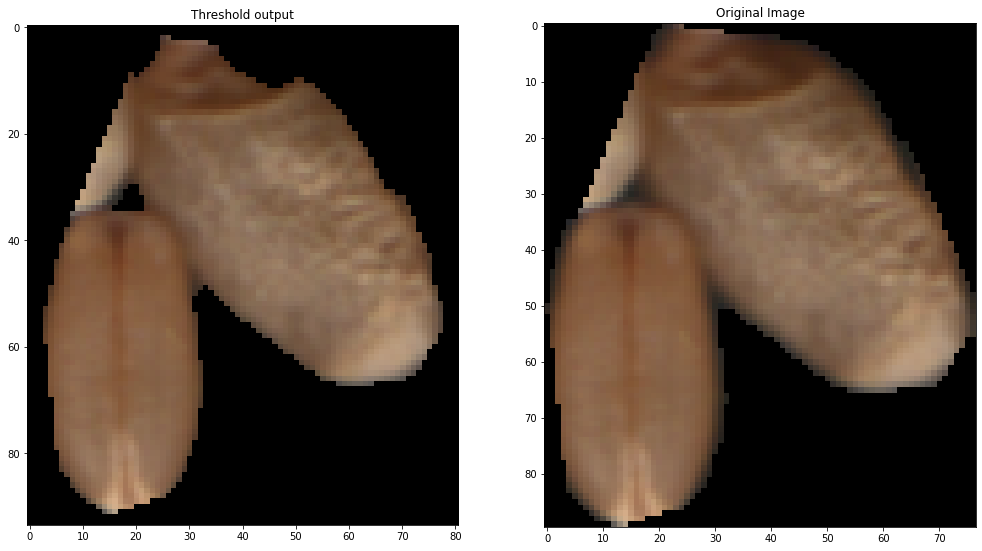

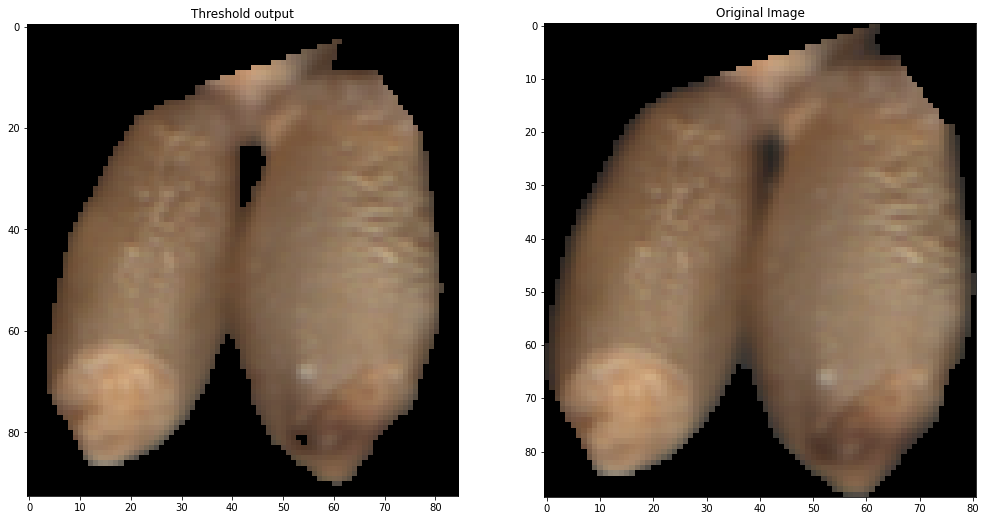

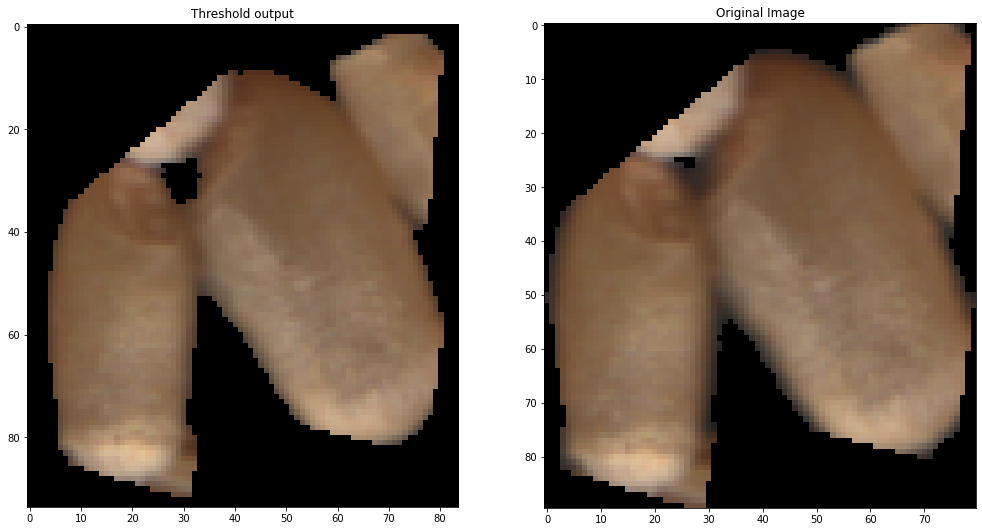

In [18]:
for i in img_names:
    im=cv2.cvtColor(cv2.imread(path+i),cv2.COLOR_BGR2RGB)
    pad=padding(im)
    pad=threshold_g(pad)
    plot_f(pad,im)